In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
plt.rcParams['font.size'] = 14
#import pylab_util as PU
import os

In [2]:
def data_to_float_array(data):
    mylist = data.split('\n')
    clean_list = mylist#[3:]
    clean_2 = list(filter(None,clean_list))
    
    start_ind = None
    
    for i, row in enumerate(clean_2):
        if row.find("1,") == 0:
            start_ind = i
    
    end_ind = None
    
    for i, row in enumerate(clean_2):
        if row.find("input") > -1:
            end_ind = i
            
    clean_3 = clean_2[start_ind:end_ind]
    nested_list = [row.split(',') for row in clean_3]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array
    #return str_array

In [3]:
import control
#import digcomp

In [4]:
import serial
import serial_utils

In [5]:
import importlib

In [57]:
importlib.reload(serial_utils)

<module 'serial_utils' from '/home/pi/SBR_git/serial_utils.py'>

In [58]:
import platform

In [59]:
plat_str = platform.platform().lower()
plat_str

'linux-4.9.41-v7+-armv7l-with-debian-9.1'

In [60]:
myos = 'win'

if 'linux' in plat_str:
    myos = 'linux'
elif 'darwin' in plat_str:
    myos = 'mac'

print('myos: %s' % myos)

myos: linux


In [61]:
if myos == 'linux':
    portname = serial_utils.find_portname_RPi()
elif myos == 'mac':
    #portname = '/dev/tty.usbmodem1421'
    portname = '/dev/cu.usbmodem1421'
else:
    portname = 'COM3'
    
print('portname: %s' % portname)

portname: /dev/ttyACM1


In [62]:
ser = serial_utils.serial_test(portname)

In [63]:
ser.open()

In [65]:
ser.print_all()

motor testing v. 1.0.0
input test case




In [66]:
ser.flush()

In [67]:
ser.write_char("c")

In [68]:
ser.print_all()

getting ready to calibrate
calibration results:
128 212 88 168 88 124 
2500 2500 2500 2500 2500 2500 

input test case




In [69]:
ser.print_all()

In [70]:
ser.write_char("n")
ser.write_float(0)

In [71]:
ser.print_all()

nom = 0
input test case

input test case

input test case

input test case

input test case

input test case




In [72]:
ser.write_char("k")
ser.write_float(0.1)

In [73]:
ser.print_all()

In [74]:
ser.write_char("d")
ser.write_float(0.3)#0.2

In [75]:
ser.print_all()

kp = 0.1000
input test case




In [76]:
ser.write_char("a")
ser.write_int(1000)
time.sleep(0.5)
ser.print_all()

kd = 0.3000
input test case




In [77]:
ser.print_all()

amp = 1000
input test case




In [78]:
time.sleep(2)
ser.write_char("1")
time.sleep(0.1)
data = ser.get_data()

In [79]:
data_array = data_to_float_array(data)

In [87]:
f = open('swept_sine_1.csv','w')

In [88]:
f.write(data)
f.close()

In [89]:
t_ms = data_array[:,1]
des_pos = data_array[:,2]
e = data_array[:,3]
diff = data_array[:,4]
pos = data_array[:,-1]
t = t_ms/1000

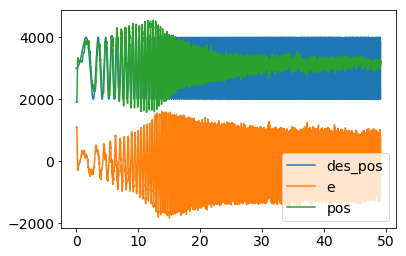

In [91]:
plt.figure()
plt.plot(t,des_pos,t,e,t,pos)
plt.legend(['des_pos','e','pos'])

In [92]:
e.max()

1616.0

In [83]:
e.min()

2000.0

In [84]:
pwm1.max()

1616.0

In [85]:
pwm1.min()

-1826.0

In [86]:
ediff = e[1:] - e[0:-1]

(-300, 250)

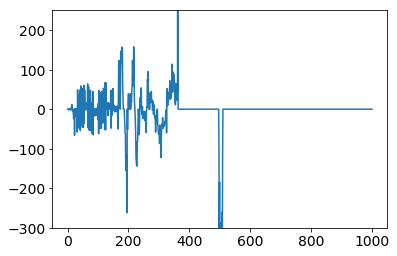

In [97]:
plt.figure()
plt.plot(ediff)
plt.ylim([-300,250])

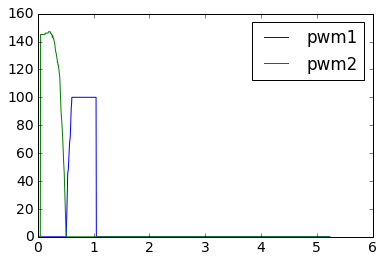

In [92]:
plt.figure()
plt.plot(t,pwm1,t,pwm2)
plt.legend(['pwm1','pwm2'])

In [80]:
ser.write_char("k")
ser.write_float(0.03)

In [81]:
ser.print_all()

kp = 0.0300
input test case


